# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.111479e+01     7.599410e+00
 * time: 0.0033431053161621094
     1     2.704420e+01     5.528065e+00
 * time: 0.014768123626708984
     2     1.721050e+01     3.255055e+00
 * time: 0.028583049774169922
     3     1.139878e+01     1.919092e+00
 * time: 0.04240107536315918
     4     1.039494e+01     1.830281e+00
 * time: 0.053663015365600586
     5     9.688004e+00     1.208802e+00
 * time: 0.06487798690795898
     6     9.227074e+00     1.050852e+00
 * time: 0.07601308822631836
     7     8.914739e+00     8.223710e-01
 * time: 0.08718609809875488
     8     8.600056e+00     6.612267e-01
 * time: 0.09881305694580078
     9     8.333153e+00     6.092563e-01
 * time: 0.11039900779724121
    10     8.200929e+00     4.987490e-01
 * time: 0.1221470832824707
    11     8.123712e+00     3.511025e-01
 * time: 0.13360309600830078
    12     8.085220e+00     5.690842e-01
 * time: 0.1423490047454834
    13     8.039547e+00     4.521540e-01
 * ti

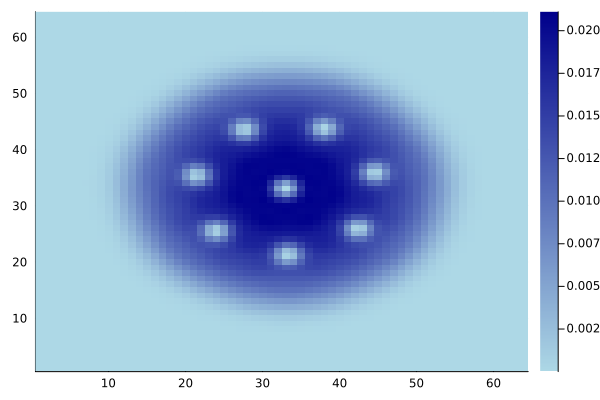

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)